In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [5]:
class LinearRegression():
    
    def __init__(self, learning_rate = 0.0001, n_iter = 10000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        
        for _ in range(self.n_iter):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            dw = (2/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (2/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [7]:
def r_squared(y, predictions):
    ss_total = np.sum((y - np.mean(y))**2)  
    ss_residual = np.sum((y - predictions)**2)  
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [12]:
if __name__ == '__main__':
    
    X, y = make_regression(n_samples=500, n_features=1, noise=15, random_state=4)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression(learning_rate=0.01, n_iter=100000)
    model.fit(X_train, y_train)
    
    ## Prediction
    predictions = model.predict(X_test)
    r2_score = r_squared(y_test, predictions)
    print(f"R-squared score: {r2_score}")

R-squared score: 0.9599390381755296


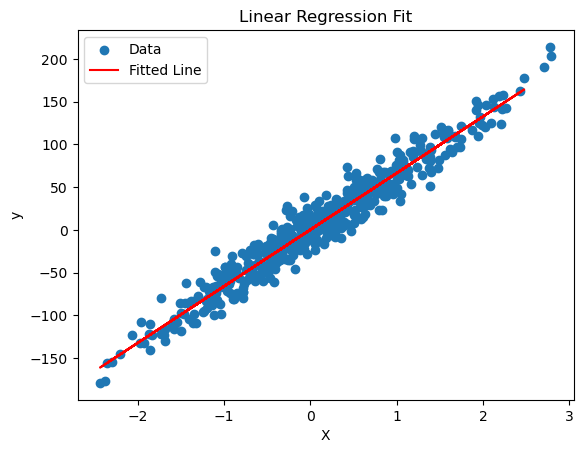

In [15]:
plt.scatter(X, y, label="Data")
plt.plot(X_test, predictions, color='red', label="Fitted Line")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()